# Metodo de Montecarlo

El método de Montecarlo es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas complejas y costosas de evaluar con exactitud. El método se llamó así en referencia al Casino de Montecarlo (Mónaco) por ser “la capital del juego de azar”, al ser la ruleta un generador simple de números aleatorios. 

En la práctica este análisis consiste en ejecutar varias veces los diferentes sucesos variando aleatoriamente su valor en función de la función estadística que los define, dando como resultado un conjunto de valores finales. Este conjunto de valores permite calcular el valor medio y la variabilidad para el conjunto.


# Utilizando el metodo de montecarlo para aproximar el valor de π 

<img src=https://elfreneticoinformatico.com/wp-content/uploads/2018/11/Screenshot_1.png>    

Sabemos que el lado del cuadrado que contiene al circulo es 2 veces el radio del circulo 
Por probabilidades podriamos decir que la probabilidad de que un evento x que ocurre dentro del cuadrado caiga dentro del circulo podria describirse de esta forma:

<img src=http://elfreneticoinformatico.com/wp-content/uploads/2018/11/Screenshot_1-1.png>

<img src=http://elfreneticoinformatico.com/wp-content/uploads/2018/11/Screenshot_1-2.png>



y matemaitcamente eso es:

<img src=http://elfreneticoinformatico.com/wp-content/uploads/2018/11/pm2.png>

despejando nos queda:

<img src=http://elfreneticoinformatico.com/wp-content/uploads/2018/11/im1.png>


En este cálculo se tienen que hacer dos consideraciones importantes:

* Si los puntos no están uniformemente distribuidos, el método es inválido.
* La aproximación será pobre si solo se lanzan unos pocos puntos. En promedio, la aproximación mejora conforme se aumenta el número de puntos.

### Implementacion


* Generamos dos números aleatorios entre 0 y 1 en total 1000 veces.
* Calculamos X * X + Y * Y
    * Si el valor es < 1 estaremos dentro del círculo
    * Si el valor es > 1 estaremos enconces fuera del círculo
* Calculamos el número total de veces (puntos) que están dentro del círculo y dividimos entre el total de intentos. Así obtenemos la probabilidad (aproximada) de caer en el cículo.
* Con esa probabilidad podremos aproximar el valor de π, y repetiemos el experimento un número de veces determinadas (por ejemplo 100) para obtener diferentes aproximaciones. Nunca va a ser exacto.
* Calculamos el primedio de los 100 experimentos anteiores para el valor final de π.

3.1408000000000014


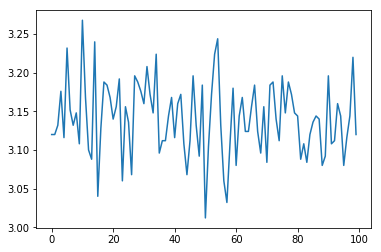

In [28]:
import matplotlib.pyplot as plt
import numpy as np

pi_avg = 0
n_exp = 100
n = 1000
pi_value_list = []
for i in range(n_exp):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z<=1:
            # Estamos dentro del circulo
            value += 1
    float_value = float(value)
    pi_value = (float_value * 4) / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
    
pi = pi_avg/n_exp
print(pi)
plt.plot(pi_value_list)
        
        

Lo que estariamos haciendo es algo como esto: https://upload.wikimedia.org/wikipedia/commons/e/e5/Estimacion_de_Pi_por_Montercarlo.gif

In [29]:
# una forma mucho mas corta de implementarlo
def pi(n, batch=1000):
    t = 0
    for i in range(n // batch):
        p = np.random.rand(batch, 2)
        p = (p * p).sum(axis=1)
        t += (p <= 1).sum()
    return 4 * t / n

In [30]:
pi(10**8)

3.14168936